In [ ]:
import numpy as np
import imageio as io
import os
import pandas as pd
import matplotlib.pyplot as plt

# Data loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Unzip folder with images on Google Drive
!unzip drive/MyDrive/DSSS_ex8_Unet/BAGLS_4096.zip

In [ ]:
# We will use a smaller version of the BAGLS dataset with 224x224 pixel images
# Original BAGLS dataset: bagls.org
data_path = 'BAGLS_4096/'
file_names = os.listdir(data_path)
file_names.sort()

# get paths of images and masks
images = [data_path + x for x in file_names if not x.endswith('seg.png')]
masks = [x.split('.')[0]+'_seg.png' for x in images]

print(images[0])
print(masks[0])

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test dataset
# train_im, test_im, train_masks, test_masks = 

print(len(train_im), len(test_im))

In [ ]:
def load_data(image_paths, mask_paths):
    # Load images
    X = np.asarray([io.imread(img, as_gray=True) for img in image_paths])
    X = X.astype('float32')[..., None] / 255.0  # scale values to [0,1] range

    # Load masks
    y = np.asarray([io.imread(mask) for mask in mask_paths])
    y = y.astype('float32')[..., None] / 255.0
    
    print(f'Loaded images of shape {X.shape} and masks of shape {y.shape}')
    return X, y

In [ ]:
# Load datasets
X_train, y_train = load_data(train_im, train_masks)
X_test, y_test = load_data(test_im, test_masks)

Loaded images of shape (3072, 224, 224, 1) and masks of shape (3072, 224, 224, 1)
Loaded images of shape (1024, 224, 224, 1) and masks of shape (1024, 224, 224, 1)


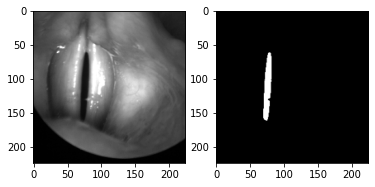

In [ ]:
# Plot training image with mask (glottis)
def show_image_and_mask(x, y):
    plt.subplot(1,2,1)
    plt.imshow(x[...,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(y[...,0], cmap='gray')
    plt.show()
    
    
show_image_and_mask(X_train[0], y_train[0])

# U-Net
**Paper:** <br>
Ronneberger, O., Fischer, P., & Brox, T. (2015, October). U-net: Convolutional networks for biomedical image segmentation. In _International Conference on Medical image computing and computer-assisted intervention_ (pp. 234-241). Springer, Cham.

<img align="left" src=https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png width=800>

In [ ]:
from keras.layers import Conv2D, Input, MaxPool2D, UpSampling2D, Activation, BatchNormalization, Concatenate
from keras.models import Model


def conv_block(x, num_filters):
    # convolutional layer with 3x3 kernels and 'same' padding
    # batchnorm
    # ReLU activation

    # convolutional layer with 3x3 kernels and 'same' padding
    # batchnorm
    # ReLU activation
    return x


def build_Unet(filters=64, num_classes=1):
    # Input layer
    inputs = 
    
    # Encoder
    e1 = 
    p1 = 
    
    e2 = 
    p2 = 
    
    e3 = 
    p3 = 
    
    e4 = 
    p4 = 
    
    # Bottleneck
    b1 = 
    
    # Decoder
    d1 = UpSampling2D()(b1)
    d1 = 
    d1 = conv_block(d1, filters * 8)
    
    d2 = UpSampling2D()(d1)
    d2 = 
    d2 = conv_block(d2, filters * 4)
    
    d3 = UpSampling2D()(d2)
    d3 = 
    d3 = conv_block(d3, filters * 2)
    
    d4 = UpSampling2D()(d3)
    d4 = 
    d4 = conv_block(d4, filters)
    
    # Output layer
    outputs = 
    
    return Model(inputs, outputs)

In [ ]:
# Build U-Net model
# original U-Net: 64 filters


In [ ]:
model.summary()

In [ ]:
for layer in model.layers:
    if 'conv' in layer.name:
        print(layer.output_shape)  # (batch_size, height, width, channels)

# U-Net training

In [ ]:
!pip install segmentation-models

In [ ]:
from segmentation_models.metrics import iou_score
from segmentation_models.losses import dice_loss
from keras.optimizers import Adam

# Compiling the model

# Define optimizer and learning rate
# Dice loss function
# Intersection over Union (IoU) & Dice score

## Metrics for semantic segmentation

<img align="left" src=https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Intersection_of_sets_A_and_B.svg/1280px-Intersection_of_sets_A_and_B.svg.png width=250>

Intersection over Union: <br>
$\large IoU(A,B) = \Large\frac{|A\cap B|}{|A\cup B|} = \frac{\text{area of intersection}}{\text{area of union}}$

Examples:

<img align="left" src=https://www.baeldung.com/wp-content/uploads/sites/4/2022/04/fig2.png width="700">

Dice coefficient: <br>
$\large Dice(A,B) = \Large\frac{2 |A\cap B|}{|A|+|B|}$

More about Dice loss and other loss functions: https://segmentation-models.readthedocs.io/en/latest/api.html#losses

In [ ]:
# Training


model.save('unet.h5')
pd.DataFrame(history.history).to_csv('history.csv')

In [ ]:
# Usually, you you would access the training history like this:
# hist = history.history

# But I trained the model beforehand, so we load the history from a .csv file:
hist = pd.read_csv('drive/MyDrive/DSSS_ex8_Unet/history.csv')

# Plot loss for each epoch
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(hist['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

# Plot IoU score for each epoch
plt.subplot(1, 2, 2)
plt.plot(hist['iou_score'])
plt.xlabel('epoch')
plt.ylabel('IoU')
plt.show()

# Predictions

In [ ]:
from keras.models import load_model

loaded_model = load_model('drive/MyDrive/DSSS_ex8_Unet/unet.h5',
                          custom_objects={'iou_score': iou_score,
                                          'dice_loss': dice_loss})

In [ ]:
# How well does the model perform on data it has not seen before = the test dataset?


In [ ]:
# Get predicted masks for all test images


In [ ]:
idx = 0

img = X_test[idx]
mask = y_test[idx]
pred = predictions[idx]

# IoU score
iou = iou_score(mask, pred)

# Plot image, ground truth and prediction
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.title('Image')
plt.imshow(img[...,0], cmap='gray')

plt.subplot(1,3,2)
plt.title('Ground truth')
plt.imshow(mask[...,0], cmap='gray')

plt.subplot(1,3,3)
plt.title('Prediction, IoU = {:.2f}'.format(iou))
plt.imshow(pred[...,0], cmap='gray')
plt.show()

# Data augmentation
Data augmentation is used to **increase the size and diversity of the training data**. It can make the model more robust and reduce overfitting. <br>
This is achieved by applying random transformations to training images <br>
e.g. rotating, flipping, or changing brightness or contrast

In [ ]:
train_image = X_train[0]
train_mask = y_train[0]

show_image_and_mask(train_image, train_mask)

In [ ]:
import albumentations as A 

aug = A.Rotate(p=1)
# aug = A.HorizontalFlip(p=1)
# aug = A.RandomBrightness((-0.5, 0.5), p=1)

augmented = aug(image=train_image, mask=train_mask)

show_image_and_mask(augmented['image'], augmented['mask'])